

# Project: The Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>TMDb movie data contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### ===>Questions 

> - 1) What genre of movies have best votes (above average) ? 

> - 2) Do the most popular movies have the highest benefits ?

> - 3) How does inflation behave on the benefits of films from 2005 to 2015 and its relationship with popularity ? 

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [5]:
# loading Dataset and showing some rows
my_df = pd.read_csv('tmdb-movies.csv')
my_df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [6]:
# more information about our dataset
print(f'Number of rows {my_df.shape[0]} , Number of columns {my_df.shape[1]}')
my_df.info()

Number of rows 10866 , Number of columns 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836

In [7]:
# columns with null data
my_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**Note** :
- 1) By inspecting null values we can afford to delete the columns 'imdb_id'(we already have an id column without null values), 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'runtime', 'director'
- 2) And after replacing null values with "000"

In [8]:
# duplicated rows
my_df.duplicated().sum()

1

**Note** :
- 3) We'll have to delete 1 duplicated row

In [9]:
# showing datatypes 
my_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

**Note** :
 - To find the correlation between the income benefits over time it will be necessary to convert the columns concerned to the same type
 - 4) Let's try to change the types of 'budget_adj' and 'revenue_adj' columns to int like 'budget' and 'revenue'
 - 5) For The first question we have to split information in each row with more than one genre
 - 6) For others questions we also need to add two columns representing the benefits



### Data Cleaning 

> 1) Removing columns that are not necessairy for our analysis 

In [10]:
# drop columns 'imdb_id'(we already have an id column without null values), 'homepage', 'tagline', 
# 'keywords', 'overview', 'release_date', 'runtime', 'director'
# Let's also have a new dataframe
C_T_D =  np.array(["imdb_id","homepage","tagline", "keywords","overview","runtime","release_date", "director",])

In [11]:
df = my_df.drop(C_T_D, axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   vote_count            10866 non-null  int64  
 9   vote_average          10866 non-null  float64
 10  release_year          10866 non-null  int64  
 11  budget_adj            10866 non-null  float64
 12  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB


> 2) replacing null values with "000"

In [13]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
df.fillna("000",inplace= True)

In [15]:
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

> 3) Drop duplicated rows

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

> 4) fix types of 'budget_adj' and 'revenue_adj'

In [18]:
df.budget_adj,df.revenue_adj = df.budget_adj.astype(int), df.revenue_adj.astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   cast                  10865 non-null  object 
 6   genres                10865 non-null  object 
 7   production_companies  10865 non-null  object 
 8   vote_count            10865 non-null  int64  
 9   vote_average          10865 non-null  float64
 10  release_year          10865 non-null  int64  
 11  budget_adj            10865 non-null  int32  
 12  revenue_adj           10865 non-null  int32  
dtypes: float64(2), int32(2), int64(5), object(4)
memory usage: 1.1+ MB


> 5) split information in each row with more than one genre
 - We can create a new dataframe for this operation

In [20]:
df_genre = df.assign(genres=df.genres.str.split('|')).explode('genres')

In [21]:
df_genre.head(3)

,id,popularity,budget,revenue,original_title,cast,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Adventure,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892


> 6) Add two columns representing the benefits


In [22]:
df['benefit'] = df['revenue'] - df['budget']
df['benefit_adj'] = df['revenue_adj'] - df['budget_adj'] 

In [23]:
df.head(3)

,id,popularity,budget,revenue,original_title,cast,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,benefit,benefit_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892,1363528810,1254445953
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939,348161292,228436354,210161353
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101199955,271619025,185238201,170419070


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What genre of movies have best votes (above average) ?)

In [24]:
# We can call df_genre dataframe and check genres
df_genre.genres.unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', '000', 'Foreign'], dtype=object)

In [25]:
# let's find relationship between genre and votes
df_genre.vote_average.describe()

count    26978.000000
mean         5.956932
std          0.912318
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [26]:
# choose the genre with votes above the mean
best_votes = df_genre.groupby('genres')['vote_average'].mean()
best_votes = best_votes[best_votes.values >= 5.95]

In [27]:
# as 000 is an unknown genre it can be deleted
best_votes.drop('000', inplace= True)

In [28]:
# let's sort values
best_votes = best_votes.sort_values() 

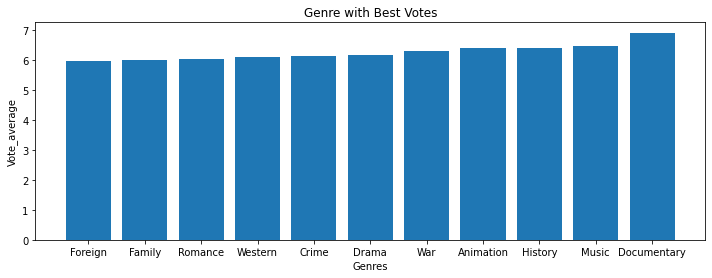

In [29]:
# view genres with vote
plt.subplots(figsize=(12, 4))
plt.bar(best_votes.index, best_votes)
plt.title('Genre with Best Votes')
plt.xlabel('Genres')
plt.ylabel('Vote_average');

 *By referring to our graph we can say that **documentary** films have the best votes*

### Research Question 2  (Do the most popular movies have the highest benefits?)

In [30]:
# chose the most popular movies
df_pop = df.groupby('original_title')[['popularity','benefit']].mean()
df_pop = df_pop.sort_values(by='popularity',ascending=False).head(15)
df_pop

,popularity,benefit
original_title,,
Jurassic World,32.985763,1.363529e+09
Mad Max: Fury Road,28.419936,2.284364e+08
Interstellar,24.949134,4.567525e+08
Guardians of the Galaxy,14.311205,6.033124e+08
Insurgent,13.112507,1.852382e+08
Captain America: The Winter Soldier,12.971027,5.447666e+08
Star Wars,12.037933,7.643980e+08
John Wick,11.422751,5.873990e+07
Star Wars: The Force Awakens,11.173104,1.868178e+09


In [31]:
# a function to view popular movies
def pop_plot( b,c):
    plt.subplots(figsize=(12, 4))
    plt.barh(df_pop.index,b)
    plt.title('Most Popular movies')
    plt.xlabel(f'{c}')
    plt.ylabel('MOVIES');

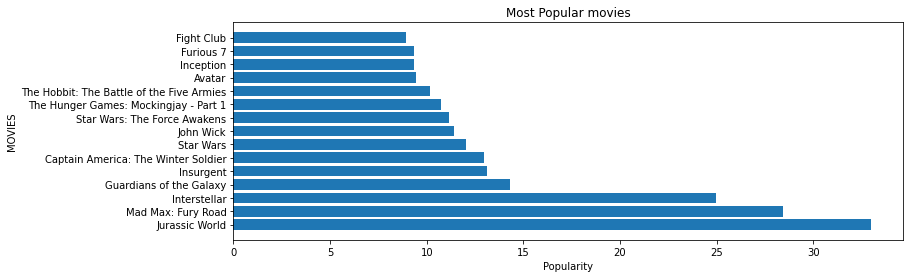

In [32]:
pop_plot(df_pop.popularity,'Popularity')

*Apparently, Jurassic World is the most popular of the movies*

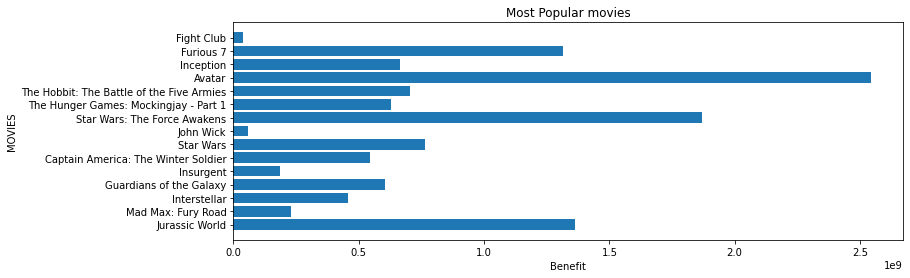

In [33]:
pop_plot(df_pop.benefit,'Benefit')

*Nevertheless, Avatar has the most revenue*

 *It can be said that the benefits on the films do not depend on their popularity. In our case among the 15 most popular it is Avatar (12th most popular not even in the top 10) that has the most income.*

### Research Question 3  (How does inflation behave on the benefits of films from 2005 to 2015 and its relationship with popularity ?)

In [34]:
# create a column representing difference between benefit and benefit_adj
df['diff'] = df['benefit_adj'] - df['benefit']


In [35]:
df.head(2)

,id,popularity,budget,revenue,original_title,cast,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,benefit,benefit_adj,diff
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137999939,1392445892,1363528810,1254445953,-109082857
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137999939,348161292,228436354,210161353,-18275001


In [36]:
# let's filter films from 2005 to 2015 with removing lines with budget = revenue = 0
inf = df.query('release_year >= 2005 and release_year <=2015 and diff != 0')

In [37]:
# recovery of columns concerned by the question [diff and popularity ]
inf = inf.groupby('release_year').mean()[['diff','popularity']]

In [38]:
inf

,diff,popularity
release_year,,
2005,4.689909e+06,0.826272
2006,2.953774e+06,0.808789
2007,2.424121e+06,0.807029
2008,5.497041e+05,0.831443
2009,-1.655154e+06,0.885278
2011,-1.408020e+06,0.902543
2012,-2.811978e+06,0.949905
2013,-2.953463e+06,0.979755
2014,-4.330006e+06,1.659155


In [71]:
# a function to view inflation
def inf_plot(a,b,c):
    plt.subplots(figsize=(6, 6))
    plt.plot(a,b)
    plt.title('How inflation behaves over time')
    plt.xlabel('Release Years');
    plt.ylabel(f'{c}')

* As we would like to see how inflation evolves, it would be more interesting to use an evolution curve than a bar chart

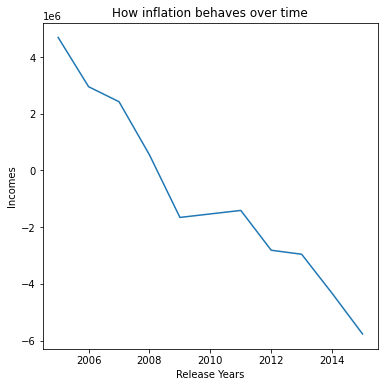

In [69]:
inf_plot(inf.index,inf['diff'],'Incomes')


*In addition to a rapid fall from 2005 to 2008, we see that before 2008 revenues were on average higher than the budget but from 2009 there are more losses.*

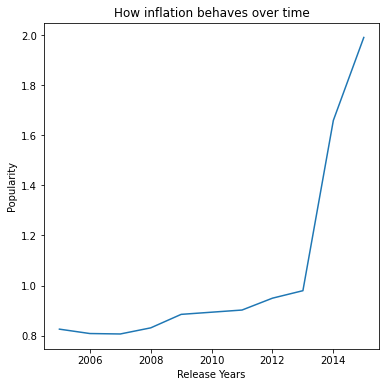

In [70]:
inf_plot(inf.index,inf['popularity'],'Popularity')

*Unlike the benefices, the most recent films are on average more popular than the old ones.*

<AxesSubplot:title={'center':'Correlation Between Incomes and Popularity'}, xlabel='Popularity', ylabel='Incomes'>

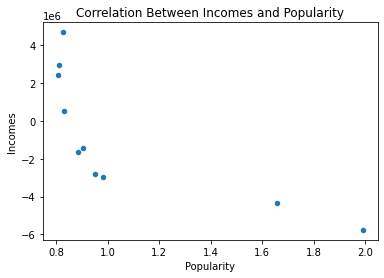

In [67]:
inf.plot(x="popularity", y="diff", kind="scatter",xlabel='Popularity',ylabel='Incomes',title='Correlation Between Incomes and Popularity')

*This graph shows us that the less popular (or old) films generate more benefits. The correlation between popularity and benefits is therefore negative.*

<a id='conclusions'></a>
## Conclusions



To conclude, we can say that:
 > - Documentary films are rated higher than even action or adventure films that are below average.

 > - The profit gain on a film does not necessarily depend on its popularity because Jurassic World (the most popular in this dataset) has revenues lower than those of Avatar (12th most popular). So popularity doesn't totally affect earnings.

 > - Over time, there is a continual decline in revenue on movies. While the most recent movies are more popular than the old movies.  

Limitations:
 > - Ideally, it would have been better to work with the same number of films on the different release years because it would give a clearer idea of the evolution of inflation on benefits.

References
> stackoverflow.com, pandas.pydata.org